In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.shape

(962, 2)

In [ ]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


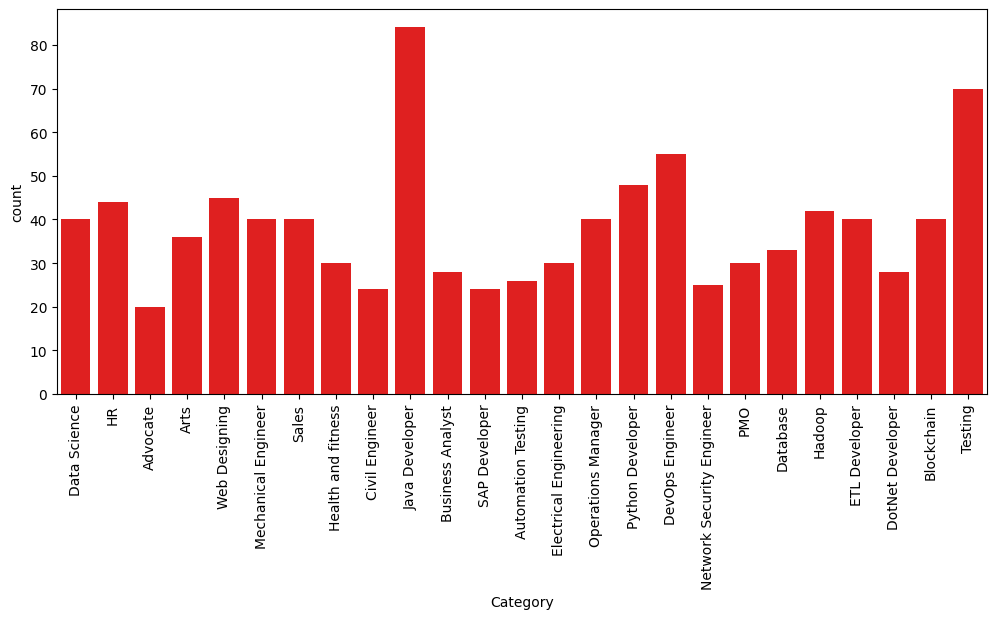

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['Category'],color='red')
plt.xticks(rotation=90)
plt.show()

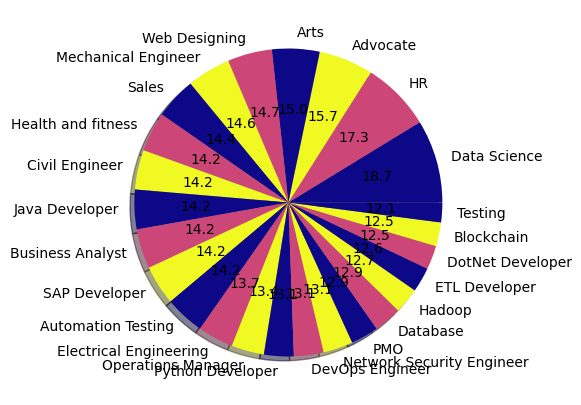

In [ ]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(18,5))

plt.pie(counts,labels=labels,autopct='1%.1f',shadow=True,colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

Exploring Resume

In [ ]:
df['Category'][0]

'Data Science'

In [ ]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

Cleaning Data
#URL'S
#hastags
#mentions
#special characters
#punctuations

In [ ]:
import re
def cleanResume(txt):
  cleantext=re.sub('https\S+\S',' ',txt)
  cleantext=re.sub('RT|cc',' ',cleantext)
  cleantext=re.sub('#\S+',' ',cleantext)
  cleantext=re.sub('@\S+',' ',cleantext)
  cleantext=re.sub('[%s]'%re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',cleantext)
  cleantext=re.sub('\s+',' ',cleantext)
  return cleantext

In [ ]:
df['Resume']=df['Resume'].apply(lambda x:cleanResume(x))

In [ ]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM NaÃ¯ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the

worda into categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])

In [ ]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredtext=tfidf.transform(df['Resume'])

In [ ]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills â¢ Proficient in MS office Wo...
958,23,â Willingness to a ept the challenges â Po...
959,23,PERSONAL SKILLS â¢ Quick learner â¢ Eagernes...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [ ]:
requiredtext

<962x7385 sparse matrix of type '<class 'numpy.float64'>'
	with 164419 stored elements in Compressed Sparse Row format>

Splitting the dataset into Training data and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(requiredtext,df['Category'],test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(769, 7385)

In [ ]:
X_test.shape

(193, 7385)

Model Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score


clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9844559585492227


Save the model

In [ ]:
import pickle

In [ ]:
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

Prediction

In [ ]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [ ]:
import pickle

#load the classifier
clf=pickle.load(open('clf.pkl','rb'))

#clean the input resume
cleaned_resume=cleanResume(myresume)

#Transform the cleaned resume using the trained Tfidfvectorizer
input_features=tfidf.transform([cleaned_resume])

#make the prediction using the loaded classifier
prediction_id=clf.predict(input_features)[0]

#map the predicted category ID to its corresponding category name
category_mapping={
    15:'Java Developer',
    16:'Testing',
    17:'C++ Developer',
    18:'C# Developer',
    19:'Python Developer',
    20:'JavaScript Developer',
    21:'PHP Developer',
    22:'ASP.NET Developer',
    23:'Ruby on Rails Developer',
    24:'DevOps Engineer',
    25:'Full Stack Developer',
    26:'Game Developer',
    27:'Embedded Developer',
    28:'Data Scientist',
    29:'Data Analyst',
    30:'Data Engineer',
    31:'Data Architect',
    32:'Database Administrator',
    33:'Network Engineer',
    34:'System Administrator',
    35:'Project Manager',
    36:'Software Engineer',
    59:'Mechanical Engineer',
    60:'Civil Engineer',

}
category_name=category_mapping.get(prediction_id,'Unknown')
print('Predicted Category':category_name)

print(prediction_id)



6
